In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas numpy


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install tqdm
!pip install ipywidgets



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install Pillow


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/91/1d/0484130df7e33e044da88a091827d6441b77f907075bf7bbe145857d6590/scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 653.6 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 463.5 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/d


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
!pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/3c/a5/54a497ca4af8e76adfe7c5a1712f3bb6b2222d464fe736b60aaafd425945/matplotlib-3.9.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/d6/4f/76d0dd0bca417691918484c26c74dd9dd44fbf528bbfeb30d754886e2c54/contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/c8/e1/059700c154bd7170d1c37061239836d2e51ff608f47075450f06dd3c292a/fonttools-4.53.1-cp311-cp311-win_amd64.whl.metadata
   


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import preprocessing
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [9]:
train_dir='images/train'
test_dir='images/test'

In [10]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels
        

In [11]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(train_dir)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [12]:
print(train)

                                  image      label
0            images/train\angry\im0.png      angry
1            images/train\angry\im1.png      angry
2           images/train\angry\im10.png      angry
3          images/train\angry\im100.png      angry
4         images/train\angry\im1000.png      angry
...                                 ...        ...
28704  images/train\surprised\im995.png  surprised
28705  images/train\surprised\im996.png  surprised
28706  images/train\surprised\im997.png  surprised
28707  images/train\surprised\im998.png  surprised
28708  images/train\surprised\im999.png  surprised

[28709 rows x 2 columns]


In [13]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(test_dir)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [14]:
print(test)

                               image      label
0          images/test\angry\im0.png      angry
1          images/test\angry\im1.png      angry
2         images/test\angry\im10.png      angry
3        images/test\angry\im100.png      angry
4        images/test\angry\im101.png      angry
...                              ...        ...
7173  images/test\surprised\im95.png  surprised
7174  images/test\surprised\im96.png  surprised
7175  images/test\surprised\im97.png  surprised
7176  images/test\surprised\im98.png  surprised
7177  images/test\surprised\im99.png  surprised

[7178 rows x 2 columns]


In [16]:
from tqdm.notebook import tqdm
from PIL import Image

In [17]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [18]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [19]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [24]:
x_train = train_features/255.0
x_test = test_features/255.0

In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [28]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [30]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [33]:
model = Sequential()
# convolutional Layers
model.add(Conv2D(128,kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected Layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [36]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(x= x_train, y= y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 137s 599ms/step - accuracy: 0.2343 - loss: 1.8398 - val_accuracy: 0.2471 - val_loss: 1.8150
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 143s 638ms/step - accuracy: 0.2468 - loss: 1.8071 - val_accuracy: 0.2641 - val_loss: 1.7568
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 138s 615ms/step - accuracy: 0.2831 - loss: 1.7391 - val_accuracy: 0.3611 - val_loss: 1.6210
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 128s 566ms/step - accuracy: 0.3658 - loss: 1.6117 - val_accuracy: 0.4171 - val_loss: 1.5014
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 122s 543ms/step - accuracy: 0.4067 - loss: 1.5270 - val_accuracy: 0.4714 - val_loss: 1.3675
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 122s 542ms/step - accuracy: 0.4346 - loss: 1.4543 - val_accuracy: 0.4868 - val_loss: 1.3233
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 123s 548ms/step - accuracy: 0.4598 - loss: 1.4059 - val_accuracy: 0.4968 - val_loss: 1.2995
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 123s 546ms/step - accuracy: 

In [38]:
model_json = model.to_json()
with open("stressdetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("stressdetectorV1.h5")

In [39]:
from keras.models import model_from_json

In [40]:
json_file = open("stressdetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("stressdetectorV1.h5")

In [41]:
label = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [45]:
def ef(image):
    img = load_img(image, color_mode='grayscale')
    feature = np.array(img)
    feature.reshape(1,48,48,1)
    return feature/255.0

In [58]:
image = 'images/test/sad/im3.png'
print("original image is sad")

img = ef(image)

img = np.resize(img, (48, 48))  # Resize
img = np.expand_dims(img, axis=-1)  # Add channel dimension (48, 48, 1)
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is  sad


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

original images is a sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
model prediction is  sad


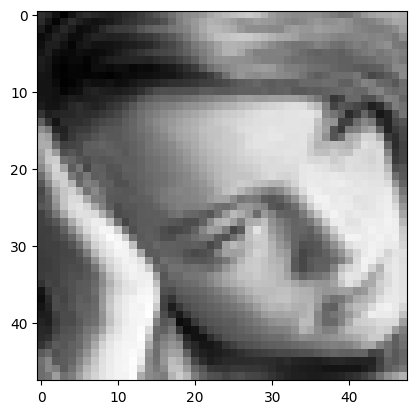

In [71]:
image = 'images/test/sad/im36.png'
print ("original images is a sad")
img = ef(image)

img = np.resize(img, (48, 48))  # Resize
img = np.expand_dims(img, axis=-1)  # Add channel dimension (48, 48, 1)
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48), cmap = 'gray')

original images is a neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model prediction is  neutral


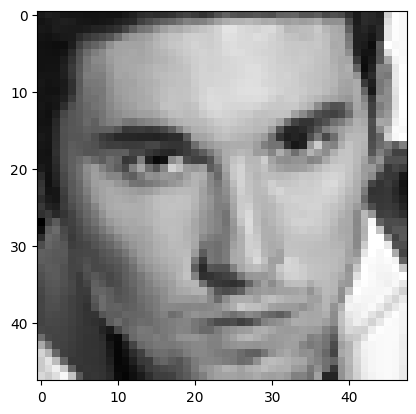

In [73]:
image = 'images/test/neutral/im37.png'
print ("original images is a neutral")
img = ef(image)

img = np.resize(img, (48, 48))  # Resize
img = np.expand_dims(img, axis=-1)  # Add channel dimension (48, 48, 1)
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48), cmap = 'gray')

original images is a fearful
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
model prediction is  fearful


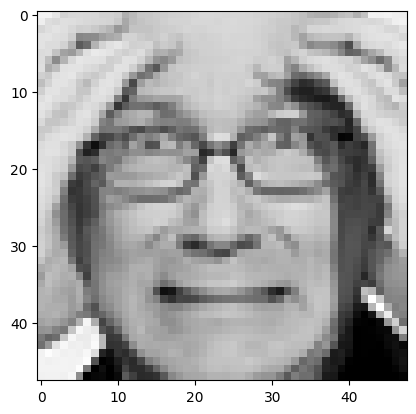

In [75]:
image = 'images/test/fearful/im38.png'
print ("original images is a fearful")
img = ef(image)

img = np.resize(img, (48, 48))  # Resize
img = np.expand_dims(img, axis=-1)  # Add channel dimension (48, 48, 1)
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48), cmap = 'gray')